# Homework 1, Problem 5: Changing Bounds of Integration

In [1]:
import numpy as np

def integrand(x, a):
    return x**(a-1)*np.exp(-1*x)

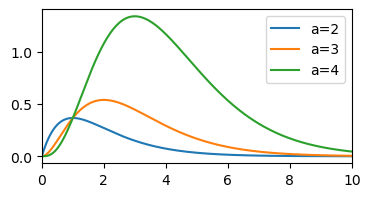

In [2]:
import matplotlib.pyplot as plt

max_x = 10
x = np.linspace(0, max_x, num=200)
y = {}
for a in [2,3,4]:
    y[f"a={a}"] = [integrand(xi, a) for xi in x]

fig, ax = plt.subplots()
fig.set_size_inches(4,2)

for label, ys in y.items():
    plt.plot(x, ys, label=label)
plt.xlim(0,max_x)
plt.legend()
plt.show()

The position of the maximum varies with $a$. It occurs when $\partial_x \phi=0$:
$$
\begin{align*}
    0 &= \partial_x \left( x^{a-1}e^{-x} \right)\\
    0 &= (a-1)x^{a-2}e^{-x} - x^{a-1}e^{-x}\\
    x &= a-1
\end{align*}
$$
The peak of the integrand will be in the center of our changed domain when:
$$
\begin{align*}
    1/2 &= \frac{a-1}{a-1+c}\\
    c &= a-1
\end{align*}
$$
Using the substitution $x = cz/(1-z)$, find our new representation of the gamma function: 
$$
\begin{align*}
\Gamma(a) &= \int_0^1 \frac{cz}{1-z}^{a-1}e^{-cz/(1-z)} [c/(1-z)^2dz]\\
&= c^a \int_0^1 dz \frac{z^{a-1}}{(1-z)^{a+1}}e^{-cz/(1-z)}\\
&= c^a \int_0^1 \exp\left[ -cz/(1-z)\ln{\frac{z^{a-1}}{(1-z)^{a+1}}}\right]dz\\
&= c^a \int_0^1 \exp\left[ \frac{-cz((a-1)\ln(z) - (a+1)\ln(1-z))}{1-z}\right]dz
\end{align*}
$$

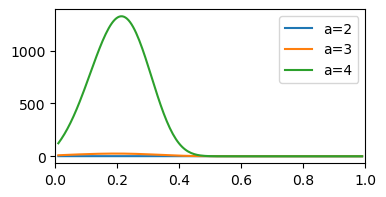

In [3]:
def integrand_z(z, a):
    c = a-1
    exponent = -1*c*z* ( (a-1)*np.log(z)-(a+1)*np.log(1-z) ) / (1-z)
    return c**a * np.exp(exponent)

x = np.linspace(0.01, 0.99, num=200)
y = {}
for a in [2,3,4]:
    y[f"a={a}"] = [integrand_z(xi, a) for xi in x]

fig, ax = plt.subplots()
fig.set_size_inches(4,2)

for label, ys in y.items():
    plt.plot(x, ys, label=label)
plt.xlim(0,1)
plt.legend()
plt.show()

In [4]:
def trapezoid_rule(left, right, integrand, a):
    width = right - left
    return (integrand(left, a) + integrand(right, a)) * width / 2

def trapezoid_subintervals(l, r, num_subintervals, integrand, a):
    width = (r-l)/num_subintervals
    lefts = np.linspace(l, r-width, num=num_subintervals)
    rights = np.linspace(l+width, r, num=num_subintervals)
    return np.sum(trapezoid_rule(lefts, rights, integrand, a))

def romberg_integration(l, r, integrand, a):
    num_splits = 5

    R_im = [[trapezoid_rule(l, r, integrand, a)]]
    for i in range(1, num_splits+1):
        R_im.append([0]*(i+1))
        R_im[i][0] = trapezoid_subintervals(l, r, 2**i, integrand, a)
        for m in range(i):
            R_im[i][m+1] = R_im[i][m] + (R_im[i][m] - R_im[i-1][m]) / (4**(m+1)-1)
    error = abs(R_im[num_splits-1][num_splits-1] - R_im[num_splits][num_splits])
        
    return R_im[i][i], error

for a in [2, 3, 5, 8]:
    integral, err = romberg_integration(0,1,integrand, a)
    print(f"Gamma({a}): {integral}\n{'':10}{err:.3} estimated err")

Gamma(2): 0.26424111765711533
          1.16e-13 estimated err
Gamma(3): 0.1606027941427884
          9.81e-13 estimated err
Gamma(5): 0.08783632385625194
          4.6e-11 estimated err
Gamma(8): 0.051655951239537416
          2.79e-09 estimated err
